##### `NIT Colleges Opening/Closing Ranks EDA`

#### Steps in EDA
	1. Data Ingestion
	2. Perform basic data quality checks
		Missing Value treatment
	3. Perform descriptive statistics
	4. Data Visualization
		Univariate - Single column visualization
			categorical features - Countplot
			continuous features - histogram
		Bivariate - two columns
			continuous vs continuous -> scatterplot, regplot
			categorical vs con -> boxplot
			categorical vs categorical -> crosstab heatmap
		Multivariate - multiple columns
			correlation plot
			pairplot

In [2]:
# Step-1: Data Ingestion
import pandas as pd

df = pd.read_csv('nit-colleges-open-close-ranks-2025.csv')
df.head(1)

,Institute,Academic Program Short Name,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Dr. B R Ambedkar National Institute of Technol...,Bio Technology,"Bio Technology (4 Years, Bachelor of Technology)",HS,OPEN,Gender-Neutral,58341,79511


In [3]:
# Step-2: Data Sanity - Check for duplicates, null
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print("Duplicates Exist.")
    df.drop_duplicates(keep='first').reset_index(drop=True)
    print('Duplicates Removed.')
else:
    print('Duplicates does not exist')

nulls = df.isna().sum()
nulls_cnt = nulls[nulls > 0].sum()
if nulls_cnt > 0:
    print("Nulls does not exist")
else:
    print('Nulls does not exist')

Duplicates does not exist
Nulls does not exist


In [4]:
cat = list(df.columns[df.dtypes == "object"])
cat

['Institute',
 'Academic Program Short Name',
 'Academic Program Name',
 'Quota',
 'Seat Type',
 'Gender']

In [5]:
con = list(df.columns[df.dtypes != "object"])
con

['Opening Rank', 'Closing Rank']

In [6]:
def replacer(df: pd.DataFrame):
    cat = list(df.columns[df.dtypes == "object"])    
    for col in df.columns:        
        if col in cat:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)
    print("Missing values replaced")

replacer(df)

Missing values replaced


In [7]:
# Step-3: Perform descriptive statistics
cat, con

(['Institute',
  'Academic Program Short Name',
  'Academic Program Name',
  'Quota',
  'Seat Type',
  'Gender'],
 ['Opening Rank', 'Closing Rank'])

In [8]:
df[con].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Opening Rank,6255.0,15868.60,43168.03,2.0,1935.5,5770.0,15199.5,1002085.0
Closing Rank,6255.0,19322.52,53425.01,6.0,2253.5,6625.0,18051.5,1314967.0


In [9]:
df[cat].describe().T

,count,unique,top,freq
Institute,6255,32,"National Institute of Technology, Rourkela",402
Academic Program Short Name,6255,83,Computer Science and Engineering,741
Academic Program Name,6255,86,"Computer Science and Engineering (4 Years, Bac...",741
Quota,6255,5,OS,3312
Seat Type,6255,10,OPEN,1278
Gender,6255,2,Gender-Neutral,3769


Academic Program Short Name
Computer Science and Engineering                                                           110
Electronics and Communication Engineering                                                  102
Mechanical Engineering                                                                      99
Electrical Engineering                                                                      96
Chemical Engineering                                                                        94
Civil Engineering                                                                           93
Architecture                                                                                39
Bio Technology                                                                              35
Instrumentation and Control Engineering                                                     23
Data Science and Engineering                                                                22
Information Technology

<Axes: xlabel='Academic Program Short Name'>

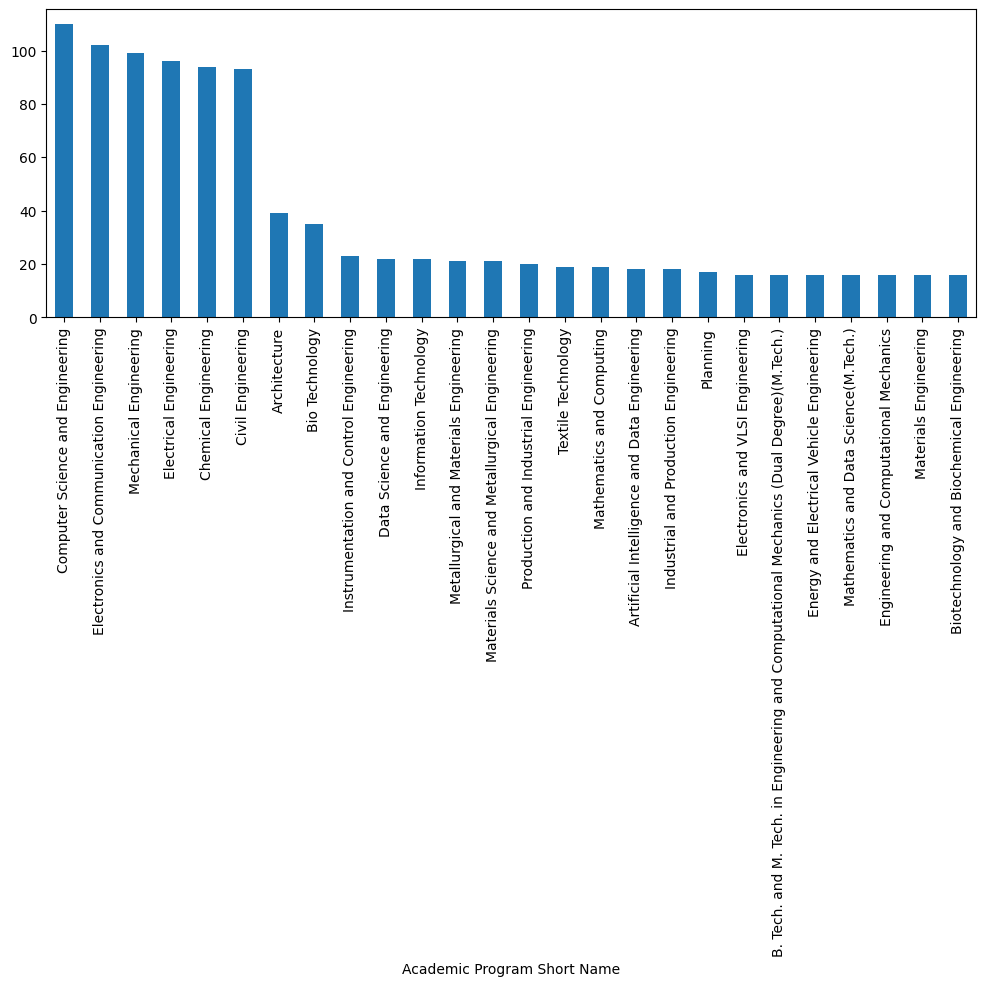

In [32]:
print(df['Academic Program Short Name'].head(1000).value_counts())
df['Academic Program Short Name'].head(1000).value_counts().plot(kind='bar', figsize=(12,4))

In [11]:
df['Seat Type'].value_counts()

Seat Type
OPEN             1278
OBC-NCL          1168
SC               1112
EWS               960
ST                951
OPEN (PwD)        383
OBC-NCL (PwD)     235
SC (PwD)           76
EWS (PwD)          68
ST (PwD)           24
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Gender-Neutral                           3769
Female-only (including Supernumerary)    2486
Name: count, dtype: int64

In [13]:
df['Institute'].value_counts()

Institute
National Institute of Technology, Rourkela                         402
National Institute of Technology, Kurukshetra                      351
National Institute of Technology, Warangal                         319
National Institute of Technology Patna                             314
Sardar Vallabhbhai National Institute of Technology, Surat         293
Dr. B R Ambedkar National Institute of Technology, Jalandhar       284
National Institute of Technology Calicut                           269
National Institute of Technology Raipur                            257
Maulana Azad National Institute of Technology Bhopal               256
National Institute of Technology Karnataka, Surathkal              250
National Institute of Technology Hamirpur                          243
National Institute of Technology, Tiruchirappalli                  240
National Institute of Technology Durgapur                          233
Motilal Nehru National Institute of Technology Allahabad           

In [14]:
# Step-4: Data Visualization
    # 1.Univariate - Single column visulization
    # 2.Bivariate - two column
    # 3.Multivariate - multiple columns
import matplotlib.pyplot as plt
import seaborn as sns

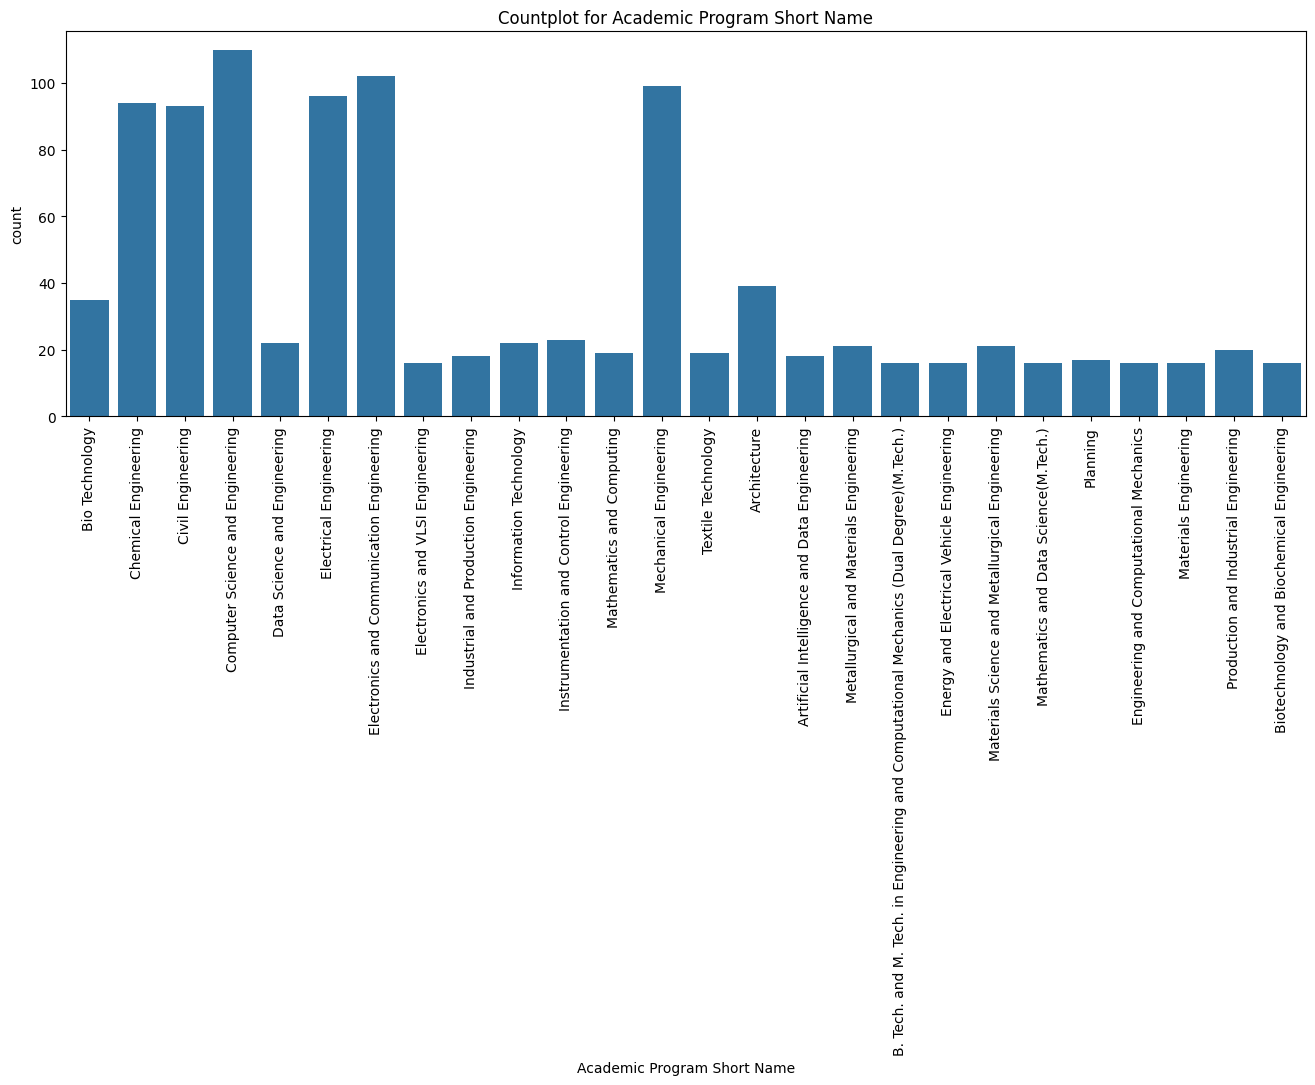

In [33]:
# Univariate analysis
    # 1. categorical features - Countplot
    # 2. continuous features - histogram

plt.figure(figsize=(16, 5)) # Set figure size (width, height)
sns.countplot(data=df.head(1000), x="Academic Program Short Name") # Plot Graph
plt.title("Countplot for Academic Program Short Name") # Add Title
plt.xticks(rotation=90)
plt.show()

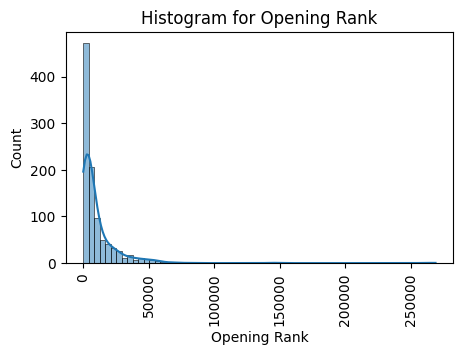

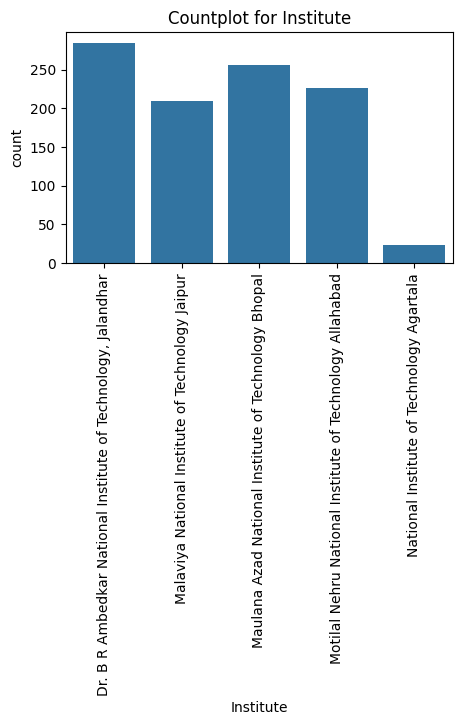

In [35]:
# Univariate Functions
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for {col}')
    plt.xticks(rotation=90)
    plt.show()

def plot_histogram(df: pd.DataFrame, col: str):
    plt.figure(figsize=(5,3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for {col}')
    plt.xticks(rotation=90)
    plt.show()

for col in con:
    plot_histogram(df.head(1000), col)
    break # Just breaking for one column

for col in cat:
    plot_count(df.head(1000), col)
    break # Just breaking for one column

In [36]:
# Bivariate Analysis
    # Analyze two variables at a time
        # 1.continuous vs continuous -> scatterplot, regplot
        # 2.categorical vs continuous -> boxplot
        # 3.categorical vs categorical -> crosstab heatmap

# Bivariate functions
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.regplot(data=df,x=x,y=y)
    plt.title(f"Scatterplot for {x} and {y}")
    plt.xticks(rotation=90)
    plt.show()

def plot_reg(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"Red"})
    plt.title(f"Regplot for {x} and {y}")
    plt.xticks(rotation=90)
    plt.show()

def plot_box(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"Boxplot for {x} and {y}")
    plt.xticks(rotation=90)
    plt.show()

con, cat

(['Opening Rank', 'Closing Rank'],
 ['Institute',
  'Academic Program Short Name',
  'Academic Program Name',
  'Quota',
  'Seat Type',
  'Gender'])

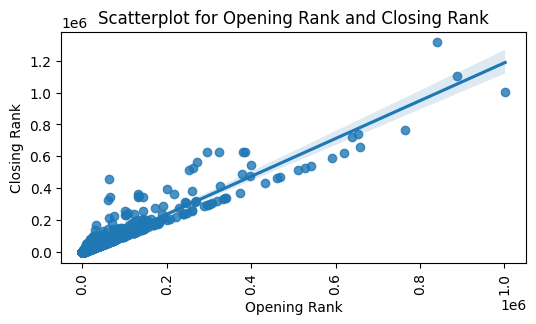

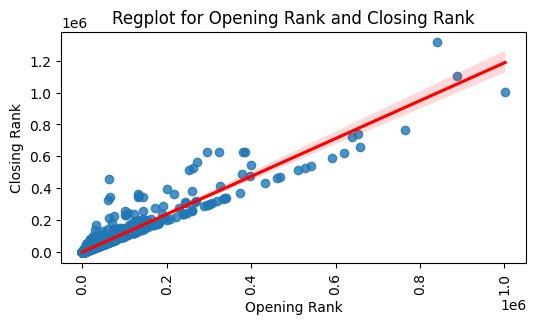

In [37]:
# 1.continuous vs continuous -> scatterplot, regplot
plot_scatter(df, 'Opening Rank', 'Closing Rank')
plot_reg(df, 'Opening Rank', 'Closing Rank')

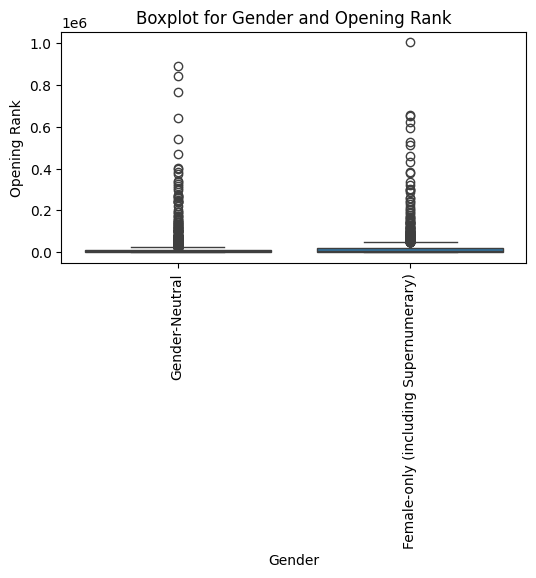

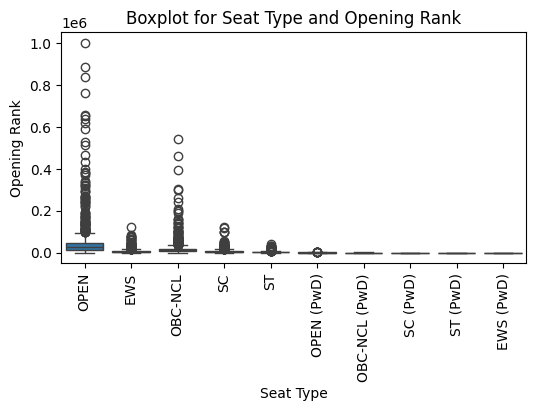

In [38]:
# 2. categorical vs continuous -> boxplot
plot_box(df, 'Gender', 'Opening Rank')
plot_box(df, 'Seat Type', 'Opening Rank')

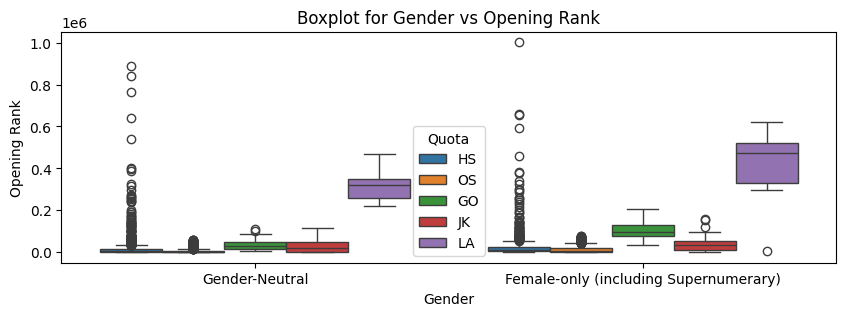

In [39]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x="Gender", y="Opening Rank", hue="Quota")
plt.title("Boxplot for Gender vs Opening Rank")
plt.show()

In [21]:
unique = df[cat].nunique()
unique

Institute                      32
Academic Program Short Name    83
Academic Program Name          86
Quota                           5
Seat Type                      10
Gender                          2
dtype: int64

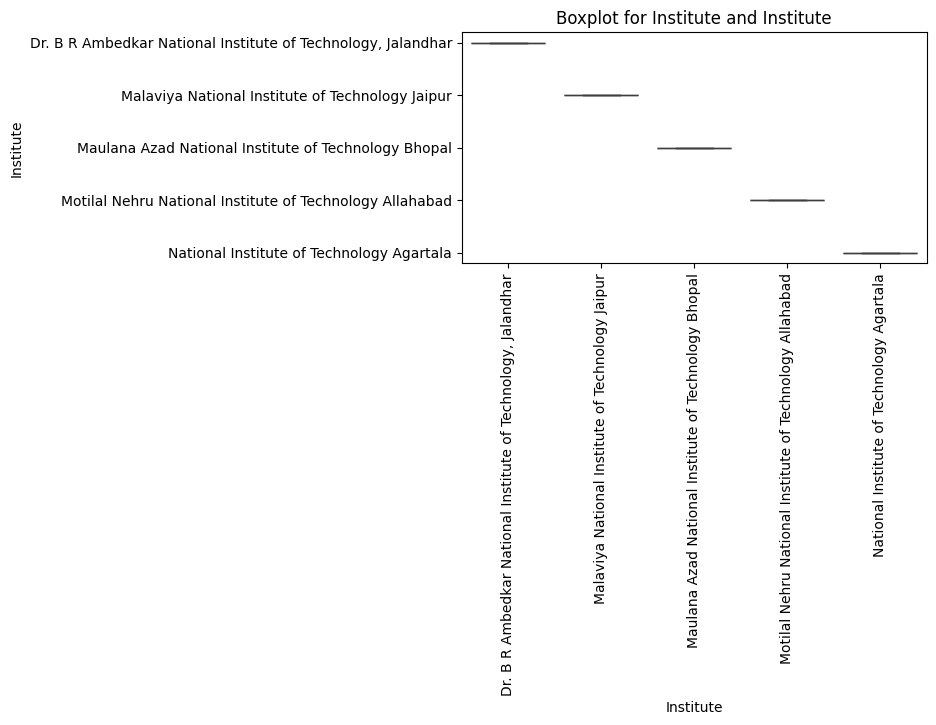

In [41]:
for col in cat:
    plot_box(df.head(1000), col, 'Institute')
    break

In [23]:
# 3. categorical vs categoric > Crosstab heatmap

def crosstab_heatmap(df: pd.DataFrame, cat_col1: str, cat_col2: str):
    ctab = pd.crosstab(df[cat_col1], df[cat_col2])
    sns.heatmap(ctab, annot=True, fmt="d")
    plt.title(f"Crosstab Heatmap for {cat_col1} vs {cat_col2}")
    plt.show()

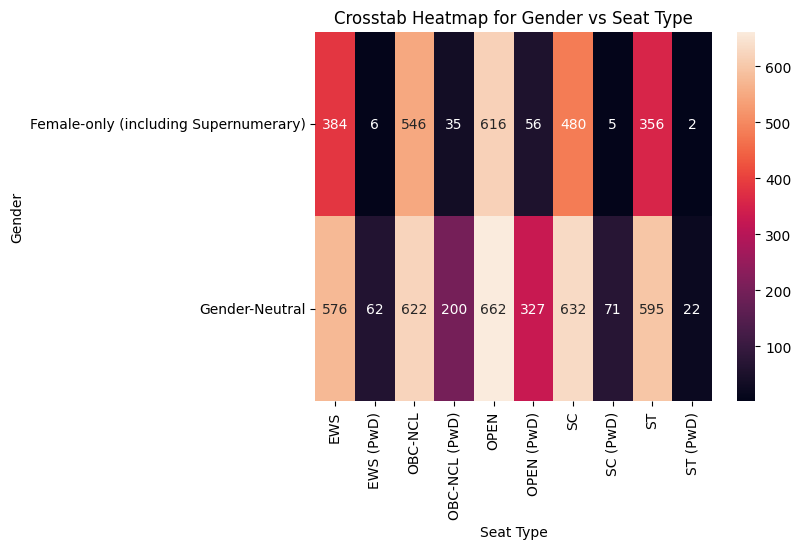

In [24]:
crosstab_heatmap(df, 'Gender', 'Seat Type')

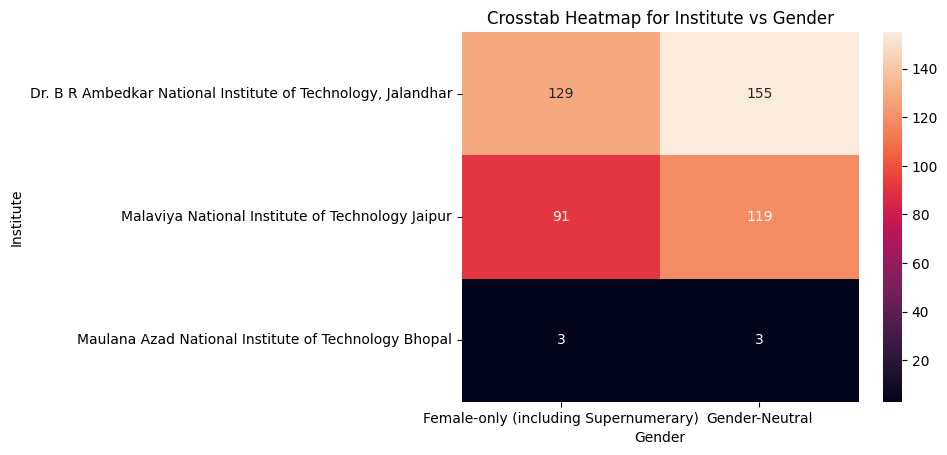

In [25]:
crosstab_heatmap(df.head(500), 'Institute', 'Gender',)

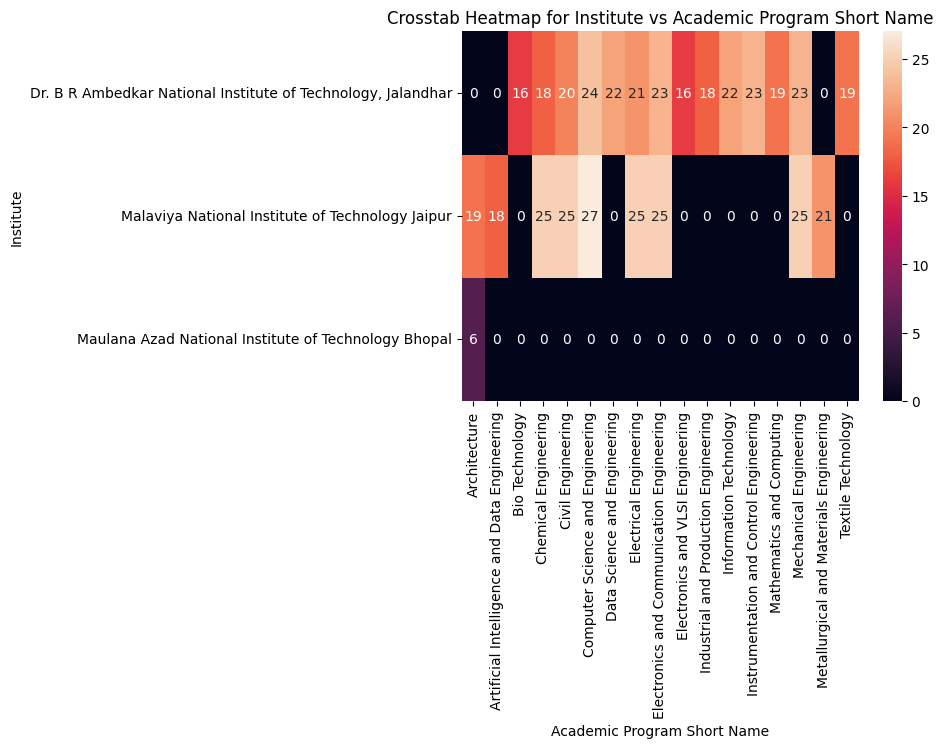

In [26]:
crosstab_heatmap(df.head(500), 'Institute', 'Academic Program Short Name',)

In [27]:
# Multivariate analysis
    # 1.correlation plot
    # 2.pairplot

corr = df.corr(numeric_only=True)
corr

,Opening Rank,Closing Rank
Opening Rank,1.000000,0.957513
Closing Rank,0.957513,1.000000


In [28]:
corr.loc["Opening Rank", "Closing Rank"]

np.float64(0.9575132578249941)

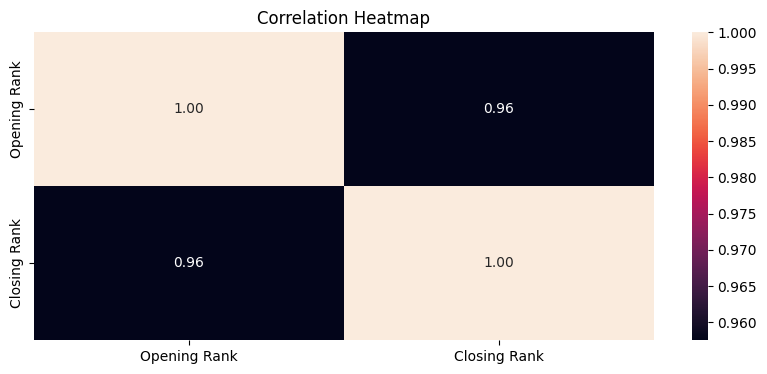

In [29]:
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

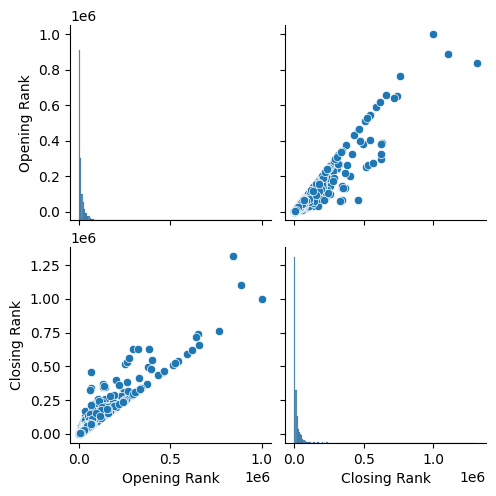

In [30]:
# Pair Plot
sns.pairplot(df[con])

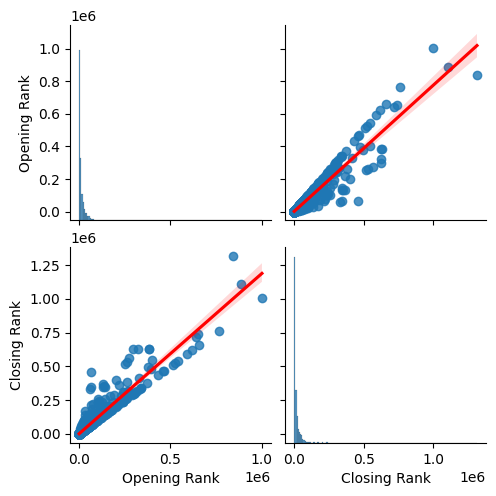

In [31]:
sns.pairplot(df[con], kind="reg", plot_kws = {"line_kws": {"color": "red"}})

##### `Questions`

##### Get Range of Ranks for 
    Quota: Open State(OS) and All India Category(AI) 
    Academic Program Name: All Engineering Branches
    Seat Type: OPEN
    Gender: Gender-Neutral

In [55]:
df = pd.read_csv('nit-colleges-open-close-ranks-2025.csv')
nit_ranks_for_general_category = (
    df.query('`Seat Type` == "OPEN" and `Gender` == "Gender-Neutral" and `Quota` in ["AI", "OS"] ')
)
nit_open_rank = int(nit_ranks_for_general_category['Opening Rank'].min())
nit_close_rank = int(nit_ranks_for_general_category['Closing Rank'].max())

print("NIT Colleges [ Min Opening Rank:", nit_open_rank, '| Max Closing Rank:', nit_close_rank,"]")

NIT Colleges [ Min Opening Rank: 2 | Max Closing Rank: 62338 ]


##### Get Range of Ranks for 
    Quota: Home State(HS) 
    Academic Program Name: All Engineering Branches
    Seat Type: OPEN
    Gender: Gender-Neutral

In [56]:
nit_ranks_for_home_state_general_category = (
    df.query('`Seat Type` == "OPEN" and `Gender` == "Gender-Neutral" and `Quota` in ["HS"] ')
)
open_rank_home_state = int(nit_ranks_for_home_state_general_category['Opening Rank'].min())
close_rank_home_state = int(nit_ranks_for_home_state_general_category['Closing Rank'].max())

print("NIT Colleges General Category [ Opening Rank:", open_rank_home_state, '| Closing Rank:', close_rank_home_state,"]")

NIT Colleges General Category [ Opening Rank: 93 | Closing Rank: 1314967 ]


##### `Get Range of Ranks for`
    Quota: Home State(HS) 
    Academic Program Name: All Engineering Branches
    Seat Type: SC
    Gender: Gender-Neutral

In [57]:
nit_ranks_for_home_state_sc_category = (
    df.query('`Seat Type` == "SC" and `Gender` == "Gender-Neutral" and `Quota` in ["HS"] ')
)
open_rank_home_state_sc = int(nit_ranks_for_home_state_sc_category['Opening Rank'].min())
close_rank_home_state_sc = int(nit_ranks_for_home_state_sc_category['Closing Rank'].max())

print("NIT Colleges SC Category: [ Opening Rank:", open_rank_home_state_sc, '| Closing Rank:', close_rank_home_state_sc,"]")

NIT Colleges SC Category: [ Opening Rank: 67 | Closing Rank: 122723 ]


##### `List Details of Lowest Opening Rank and Highest Closing Rank of Home State`

In [65]:
home_state_ranks = (
    df.query(' `Quota` == ["HS"] ')
)

lowest_rank_home_state = int(home_state_ranks['Opening Rank'].min())
highest_rank_home_state = int(home_state_ranks['Closing Rank'].max())

lowest_highest_ranks_home_state_details = (
    home_state_ranks.query('`Closing Rank` == @highest_rank_home_state or `Opening Rank` == @lowest_rank_home_state ')
)[[ "Academic Program Short Name", "Opening Rank", "Closing Rank"]]

print("NIT Colleges Lowest Opening Rank / Highest Closing Rank Home State Details:")
print(lowest_highest_ranks_home_state_details)

NIT Colleges Lowest Opening Rank / Highest Closing Rank Home State Details:
     Academic Program Short Name  Opening Rank  Closing Rank
4008      Mechanical Engineering        840727       1314967
5681                Architecture             3            46


##### `List Details of Lowest Opening Rank and Highest Closing Rank of Other States`

In [66]:
other_state_ranks = (
    df.query(' `Quota` == ["OS"] ')
)

lowest_rank_home_state = int(other_state_ranks['Opening Rank'].min())
highest_rank_home_state = int(other_state_ranks['Closing Rank'].max())

lowest_highest_ranks_home_state_details = (
    other_state_ranks.query('`Closing Rank` == @highest_rank_home_state or `Opening Rank` == @lowest_rank_home_state ')
)[[ "Academic Program Short Name", "Opening Rank", "Closing Rank"]]

print("NIT Colleges Lowest Opening Rank / Highest Closing Rank Other State Details:")
print(lowest_highest_ranks_home_state_details)

NIT Colleges Lowest Opening Rank / Highest Closing Rank Other State Details:
         Academic Program Short Name  Opening Rank  Closing Rank
1196                    Architecture             2           289
3283  Biosciences and Bioengineering         77083         77665


##### `List Details of`
    Lowest Opening Rank and Highest Closing Rank of Home State of SC Category

In [71]:
result = (
    df.query(' `Quota` == ["HS"] and `Seat Type` == "ST"')
)

lowest_rank_home_state = int(result['Opening Rank'].min())
highest_rank_home_state = int(result['Closing Rank'].max())

lowest_highest_ranks_home_state_sc_category = (
    result.query('`Closing Rank` == @highest_rank_home_state or `Opening Rank` == @lowest_rank_home_state ')
)[[ "Academic Program Short Name", "Opening Rank", "Closing Rank"]]

print("NIT Colleges Lowest Opening Rank / Highest Closing Rank ST category Home State Details:")
print(lowest_highest_ranks_home_state_sc_category)

NIT Colleges Lowest Opening Rank / Highest Closing Rank ST category Home State Details:
                      Academic Program Short Name  Opening Rank  Closing Rank
1113  Electronics and Instrumentation Engineering         18509         45138
2265             Computer Science and Engineering            44            44


In [72]:
grouped = df.groupby(['Seat Type', 'Quota']).agg(
    overall_min_rank=('Opening Rank', 'min'),
    overall_max_rank=('Closing Rank', 'max')
).reset_index()

print(grouped)

        Seat Type Quota  overall_min_rank  overall_max_rank
0             EWS    GO             29251             40634
1             EWS    HS               112            135703
2             EWS    JK              6236             76360
3             EWS    OS                52             11134
4       EWS (PwD)    HS                22               389
5       EWS (PwD)    OS                24               380
6         OBC-NCL    GO             10509            231075
7         OBC-NCL    HS                53            542586
8         OBC-NCL    JK             19628            460212
9         OBC-NCL    OS                88             27737
10  OBC-NCL (PwD)    HS                38              1687
11  OBC-NCL (PwD)    OS                18              1755
12           OPEN    GO             24829            178350
13           OPEN    HS                 3           1314967
14           OPEN    JK              9003            181650
15           OPEN    LA            22099

In [85]:
import pandas as pd

df = pd.read_csv('nit-colleges-open-close-ranks-2025.csv')
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')

# Create a summary DataFrame
summary_rows = []

for (seat_type, quota), group in df.groupby(['Seat Type', 'Quota']):
    # Min opening rank info
    min_open_idx = group['Opening Rank'].idxmin()
    # Max opening rank info
    max_open_idx = group['Opening Rank'].idxmax()
    # Min closing rank info
    min_close_idx = group['Closing Rank'].idxmin()
    # Max closing rank info
    max_close_idx = group['Closing Rank'].idxmax()
    
    summary_rows.append({
        'Branch': group.loc[max_close_idx, 'Academic Program Short Name'][0:15],
        'Seat Type': seat_type,
        'Quota': quota,
        'Opening Rank': group['Opening Rank'].min(),
        'Closing Rank': group['Closing Rank'].max()
    })

summary_df = pd.DataFrame(summary_rows)
print(summary_df)


             Branch      Seat Type Quota  Opening Rank  Closing Rank
0   Electronics and            EWS    GO         29251         40634
1   Mechanical Engi            EWS    HS           112        135703
2   Chemical Engine            EWS    JK          6236         76360
3   Biotechnology a            EWS    OS            52         11134
4   Mechanical Engi      EWS (PwD)    HS            22           389
5   Electronics Eng      EWS (PwD)    OS            24           380
6   Mechanical Engi        OBC-NCL    GO         10509        231075
7   Civil Engineeri        OBC-NCL    HS            53        542586
8   Mechanical Engi        OBC-NCL    JK         19628        460212
9   Civil Engineeri        OBC-NCL    OS            88         27737
10  Production and   OBC-NCL (PwD)    HS            38          1687
11  Electrical Engi  OBC-NCL (PwD)    OS            18          1755
12  Civil Engineeri           OPEN    GO         24829        178350
13  Mechanical Engi           OPEN